#### 예제
1. csv폴더 안에 card 폴더에 있는 '오프라인.csv' 파일 로드 
2. 컬럼의 이름을 변경 -> ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 결측치가 존재하는가? 
4. 기준년월 데이터를 시계열 데이터로 변경 
5. 남, 여 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인가?
    - 기준년이라는 컬럼을 생성하여 기준년월에서 년도만 추출
    - 건당 이용금액 컬럼을 생성하여 총이용금액 / 총이용건수
    - groupby(), pivot_table()

In [14]:
import pandas as pd

In [15]:
## 데이터파일 로드 
offline = pd.read_csv("../../csv/card/오프라인.csv", encoding='cp949')

In [ ]:
offline.info()

In [17]:
## 컬럼의 이름을 변경 
## rename()
offline.rename(
    columns = {
        'crym' : '기준년월', 
        'tco_btc_nm' : '업종', 
        'ma_fem_dc' : '성별', 
        'agegrp_dc' : '연령대', 
        'tco_btc_u_ct' : '총이용건수', 
        'tco_btc_u_am' : '총이용금액'
    }
)

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


In [18]:
## DataFrame 안에 columns 변수를 변경
offline.columns = ['기준년월', '업종', '성별', '연령대', 
                   '총이용건수', '총이용금액']

In [19]:
# 결측치를 확인 
offline.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [20]:
# 성별 데이터에서 값들의 빈도수 확인 
offline['성별'].value_counts()

성별
2    1336
1    1312
Name: count, dtype: int64

In [21]:
offline['연령대'].value_counts()

연령대
10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: count, dtype: int64

In [22]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [23]:
## 기준년월 데이터를 시계열로 변경 
offline['기준년월'] =\
    pd.to_datetime(offline['기준년월'], format='%Y%m')

In [24]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    2648 non-null   datetime64[ns]
 1   업종      2648 non-null   object        
 2   성별      2648 non-null   int64         
 3   연령대     2648 non-null   int64         
 4   총이용건수   2648 non-null   int64         
 5   총이용금액   2648 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 124.3+ KB


In [25]:
# 기준년 컬럼을 생성
offline['기준년'] = offline['기준년월'].dt.strftime('%Y')

In [26]:
# 건당이용금액 컬럼을 생성 
offline['건당이용금액'] = offline['총이용금액'] / offline['총이용건수']

In [27]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액,기준년,건당이용금액
0,2019-01-01,백화점,1,1,1,7.600000e+03,2019,7600.000000
1,2019-01-01,백화점,1,10,379,1.945872e+07,2019,51342.269129
2,2019-01-01,백화점,1,20,45173,4.747711e+09,2019,105100.635357
3,2019-01-01,백화점,1,30,271858,2.791826e+10,2019,102694.279892
4,2019-01-01,백화점,1,40,391109,3.791149e+10,2019,96933.301601


In [28]:
group_data = offline[['성별', '기준년', '건당이용금액']].groupby(
    ['성별', '기준년']).mean()

In [46]:
pivot_data = offline.pivot_table(
    index = '성별', 
    columns= '기준년', 
    values = '건당이용금액', 
    aggfunc= 'mean'
)

<Axes: xlabel='성별,기준년'>

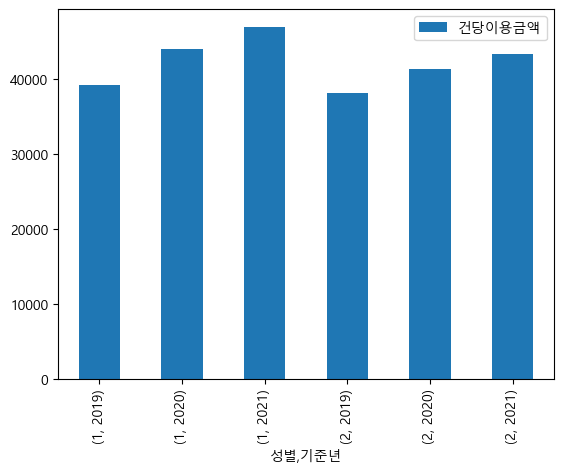

In [45]:
group_data.plot(kind='bar')

<Axes: xlabel='성별'>

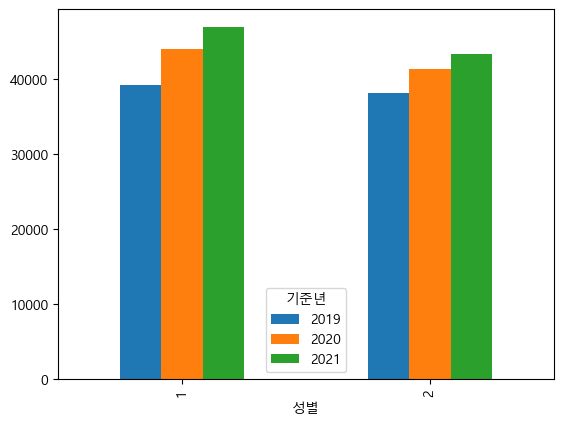

In [47]:
pivot_data.plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt
import platform

In [ ]:
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font',family='Malgun Gothic')

<Axes: xlabel='성별'>

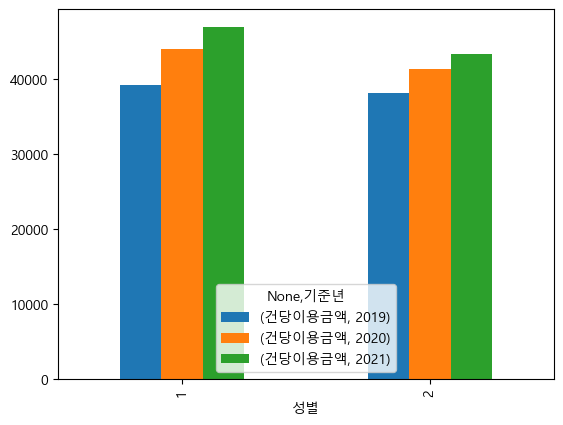

In [48]:
# index를 column으로 이동 : unstack() 
group_data.unstack().plot(kind='bar')

In [49]:
# column을 index로 이동: stack()
group_data.stack()

성별  기준년         
1   2019  건당이용금액    39184.349662
    2020  건당이용금액    44009.589591
    2021  건당이용금액    46948.320084
2   2019  건당이용금액    38107.838544
    2020  건당이용금액    41389.763130
    2021  건당이용금액    43306.318972
dtype: float64

In [51]:
## 컬럼의 데이터를 인덱스로 변경
## 설정하다(set)+ 인덱스(index)-> set_index()
offline.set_index('기준년월', inplace=True)

In [55]:
offline.columns

Index(['업종', '성별', '연령대', '총이용건수', '총이용금액', '기준년', '건당이용금액'], dtype='object')

In [56]:
## 기준년월별 총 이용금액의 합계를 그래프로 시작화
## 그룹화
group_data2=\
    offline[['업종','총이용금액']].groupby(['기준년월', '업종']).sum()

<Axes: xlabel='기준년월'>

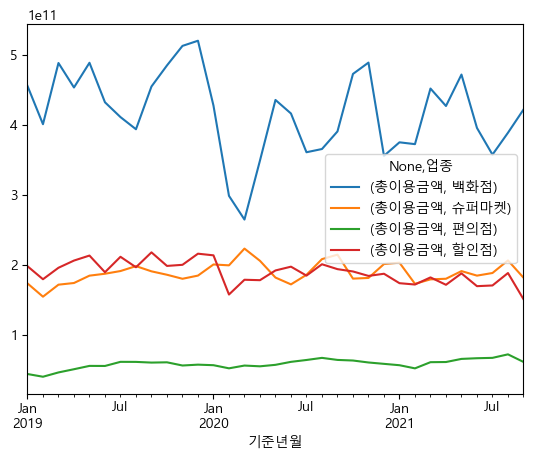

In [57]:
group_data2.unstack().plot()

In [58]:
pivot_data2=offline.pivot_table(
    index='기준년월',
    columns='업종',
    values='총이용금액',
    aggfunc='sum'
)

<Axes: xlabel='기준년월'>

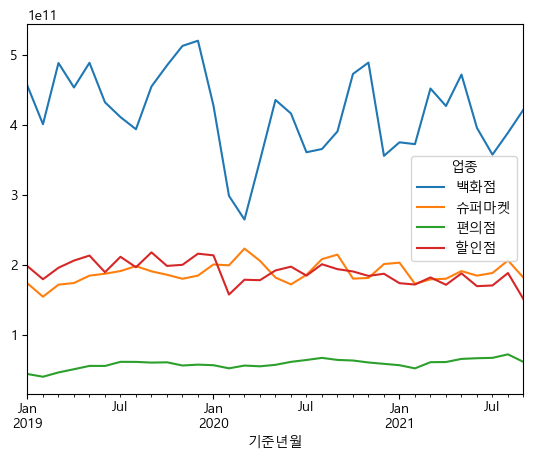

In [59]:
pivot_data2.plot()